In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("../data/processed/master_dataset.csv")
print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (1004002, 9)
  location  year soil_type     crop    rainfall  temperature  humidity  \
0     West   NaN     Sandy   Cotton  897.077239    27.676966       NaN   
1    South   NaN      Clay     Rice  992.673282    18.026142       NaN   
2    North   NaN      Loam   Barley  147.998025    29.794042       NaN   
3    North   NaN     Sandy  Soybean  986.866331    16.644190       NaN   
4    South   NaN      Silt    Wheat  730.379174    31.620687       NaN   

      yield  price  
0  6.555816    NaN  
1  8.527341    NaN  
2  1.127443    NaN  
3  6.517573    NaN  
4  7.248251    NaN  


In [6]:
print("\nMissing Values (%):")
print(data.isnull().mean() * 100)


Missing Values (%):
location        0.000100
year           99.601495
soil_type       0.089840
crop            0.000100
rainfall        0.084064
temperature     0.084064
humidity       99.685459
yield           0.084064
price          99.685459
dtype: float64


In [7]:
print("\nUnique crops:", data["crop"].nunique())
print("Unique soil types:", data["soil_type"].nunique())
print("Unique locations:", data["location"].nunique())


Unique crops: 115
Unique soil types: 30
Unique locations: 16


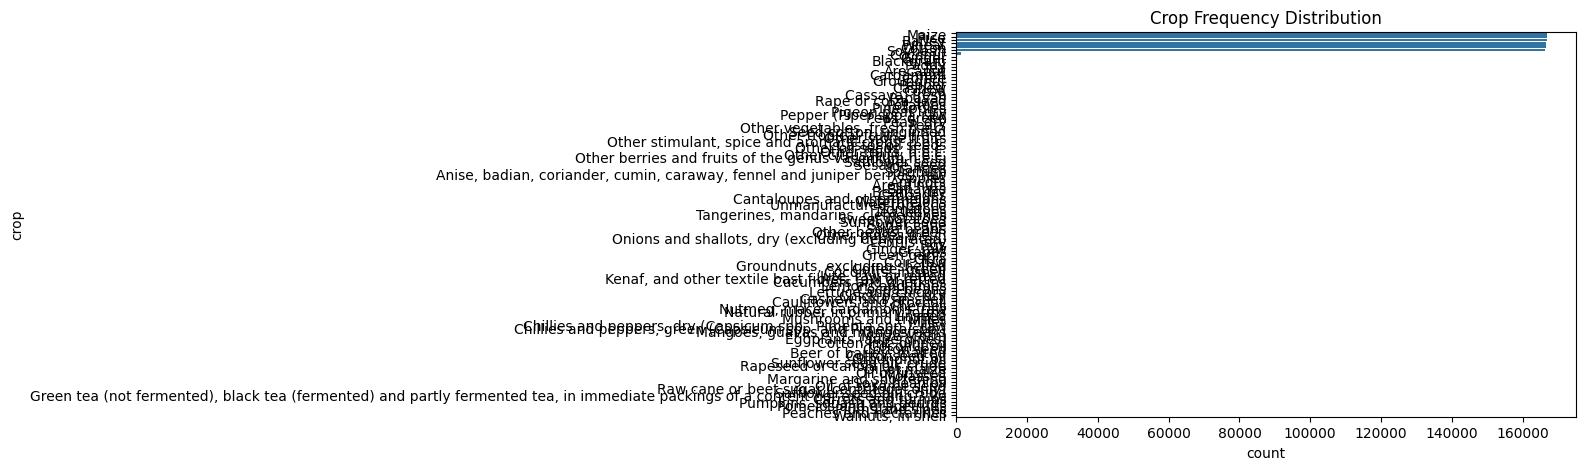

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(y=data["crop"], order=data["crop"].value_counts().index)
plt.title("Crop Frequency Distribution")
plt.show()

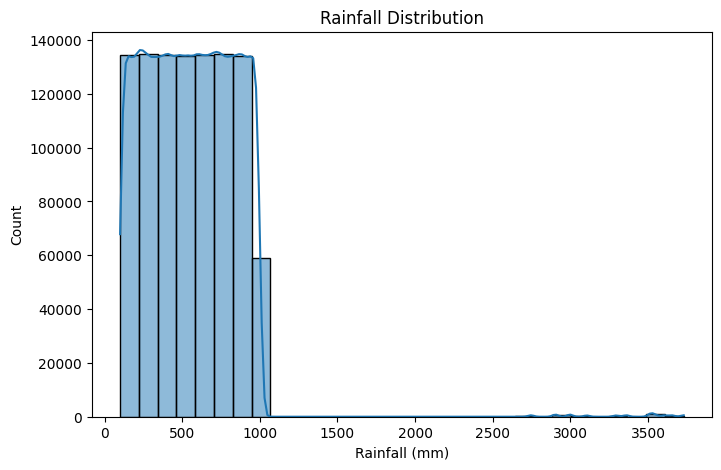

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(data["rainfall"].dropna(), bins=30, kde=True)
plt.title("Rainfall Distribution")
plt.xlabel("Rainfall (mm)")
plt.show()

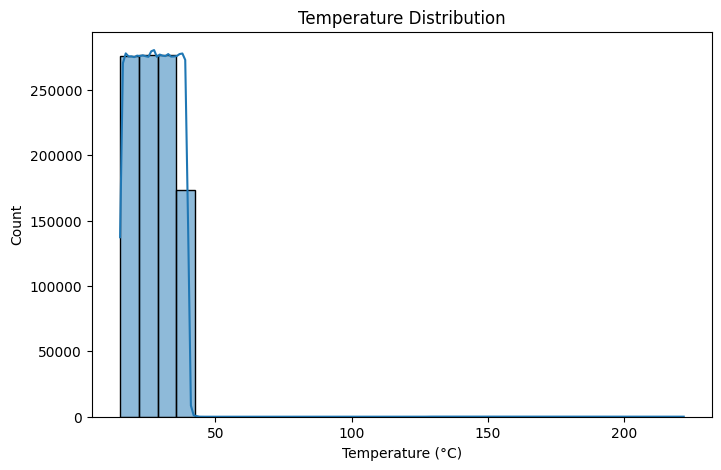

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(data["temperature"].dropna(), bins=30, kde=True)
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.show()

In [11]:
crop_rec = data[["soil_type", "rainfall", "temperature", "humidity", "crop"]].dropna()
print("\nCrop Recommendation Dataset:", crop_rec.shape)
crop_rec.to_csv("../data/processed/crop_recommendation.csv", index=False)



Crop Recommendation Dataset: (3100, 5)


In [12]:
yield_pred = data[["location", "year", "crop", "rainfall", "temperature", "humidity", "yield", "price"]].dropna()
print("Yield Prediction Dataset:", yield_pred.shape)
yield_pred.to_csv("../data/processed/yield_prediction.csv", index=False)

print("\n✅ Datasets saved:")
print("- crop_recommendation.csv")
print("- yield_prediction.csv")


Yield Prediction Dataset: (3158, 8)

✅ Datasets saved:
- crop_recommendation.csv
- yield_prediction.csv
